# Sparse models for variable selection

The goal of this notebook is to familiarize with the concept of *sparsity* and to see its connection with the selection of variables in high dimensional contexts.

A machine learning model is said to be **sparse** when it only contains a small number of non-zero parameters, with respect to the number of features that can be measured on the objects this model represents.

Let's see how sparsity works in practice.

## 1. *Sparse* variable selection on toy problems

Using `scikit-learn` let's make a toy regression problem with `n=100` samples and `d=30` variables of which only `d_rel=5` are informative. Use the flag `coef=True` to get $w^*$, *ie* the **real** weights of the toy problem.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [2]:
n = 100
d = 30
d_rel = 5

X, y, coef = make_regression(n_samples=n, n_features=d, n_informative=d_rel, coef=True)
print("Data shape: {}".format(X.shape))

Data shape: (100, 30)


Let's now perform sparse linear regression fitting a [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) model
$$\min_w \frac{1}{2 n} ||y - Xw||^2_2 + \alpha~||w||_1$$
for a fixed value of $\alpha=40$.

In [3]:
mdl = Lasso(alpha=40)
mdl.fit(X, y)

Lasso(alpha=40, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

We can inspect the value of the weights $w$ by checking `mdl.coef_`, let's plot their value on a 2D space and let's compare them with $w^*$.

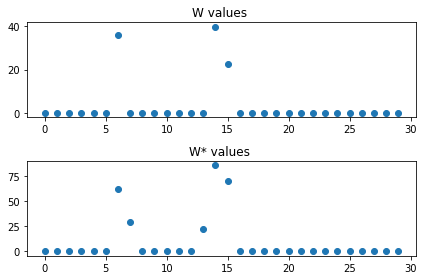

In [4]:
x_values = np.arange(coef.shape[0])
fig, axs = plt.subplots(2, 1) 
axis_iterator = iter(axs)
curr_axis = next(axis_iterator)
curr_axis.set_title("W values ")
curr_axis.scatter(x_values, mdl.coef_)
curr_axis = next(axis_iterator)
curr_axis.set_title("W* values ")
curr_axis.scatter(x_values, coef)
fig.tight_layout()

**<font color='red'>Did you correctly reconstruct the real weights?</font>**

**<font color='red'>Did you recover the exact sparse structure?</font>**



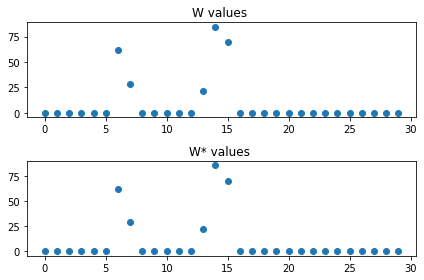

In [5]:
mdl = Lasso(alpha=1)
mdl.fit(X, y)

fig, axs = plt.subplots(2, 1) 
axis_iterator = iter(axs)
curr_axis = next(axis_iterator)
curr_axis.set_title("W values ")
curr_axis.scatter(x_values, mdl.coef_)
curr_axis = next(axis_iterator)
curr_axis.set_title("W* values ")
curr_axis.scatter(x_values, coef)
fig.tight_layout()

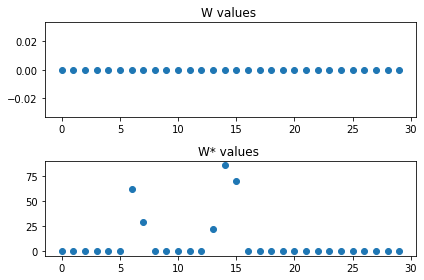

In [6]:
mdl = Lasso(alpha=100)
mdl.fit(X, y)

fig, axs = plt.subplots(2, 1) 
axis_iterator = iter(axs)
curr_axis = next(axis_iterator)
curr_axis.set_title("W values ")
curr_axis.scatter(x_values, mdl.coef_)
curr_axis = next(axis_iterator)
curr_axis.set_title("W* values ")
curr_axis.scatter(x_values, coef)
fig.tight_layout()

Answers to question (1) and (2):

The real weights obtained with the function make_regression of scikit-learn have not been fully reconstructed. The number of informative features, i.e., the number of features effectively used to build the linear model which generated the output, is in fact equal to 5 when we call the function make_regression: this tells us that only 5 over the 30 features of the generated dataset will be actually useful to estimate the output, as pointed out at https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html. 
Therefore, we can say that 25 features will have an associated entry in the vector $w$ equal to 0. When we fit the Lasso model on the same data, we don't obtain the same sparse structure, because we have introduced a degree of regularization using the parameter $\alpha$ with value $40$. When we change $\alpha$, as we do in least squares for $\lambda$, we try to trade-off bias and variance: by increasing $\lambda$, the fit of the data is made less and less precise in order to avoid overfitting, whereas if we decrease $\lambda$ and it eventually gets close to $0$ then we are simply minimizing the sum of squared residuals without any penalization (we are using ordinary least squares). The behaviour of $\alpha$ is the same, with the difference that, in our case, we are using a different norm, which is $L_1$: the $L_1$ norm geometrically tends to provide us more sparse solutions, whereas the $L_2$ norm does not, therefore we can understand that the more I increase $\alpha$, the more sparse our least squares solution will be, whereas on the other hand if $\alpha$ is very close to 0, then we are just applying ordinary least squares to solve the problem, and we will retrieve exactly the same true weights of vector $w^{*}$ both with the $L_2$ and the $L_1$ norms, because we are not considering the regularization term at all. A practical proof of these statements can be retrieved by looking at the code and outputs of the previous cells, in which I try first to fit a Lasso model with $\alpha=1$ and then with $\alpha=100$: in the former case the components of $w$ are almost the same of $w^{*}$, in the latter they all go to $0$. 

### Try to play a bit with the value of $\alpha$.

**<font color='red'>What do you expect?</font>**

**<font color='red'>What happens?</font>**

**<font color='red'>What can you say about the choice of setting $\alpha=40$ in the previous example?</font>**



In [7]:
def compare_ws_for_alphas(alpha_list, X, y, w_star):
    fig, axs = plt.subplots(len(alpha_list), 2)
    i=0
    for alpha in alpha_list:
        mdl = Lasso(alpha=alpha)
        mdl.fit(X, y)
        curr_axis = axs[i, 0]
        curr_axis.set_title("W values for alpha = %s " % alpha)
        curr_axis.scatter(x_values, mdl.coef_)
        curr_axis = axs[i, 1]
        curr_axis.set_title("W* values ")
        curr_axis.scatter(x_values, w_star)
        i+=1
    fig.subplots_adjust(top=5,bottom=-5,left=-2,right=2, hspace=0.5, wspace=0.5)


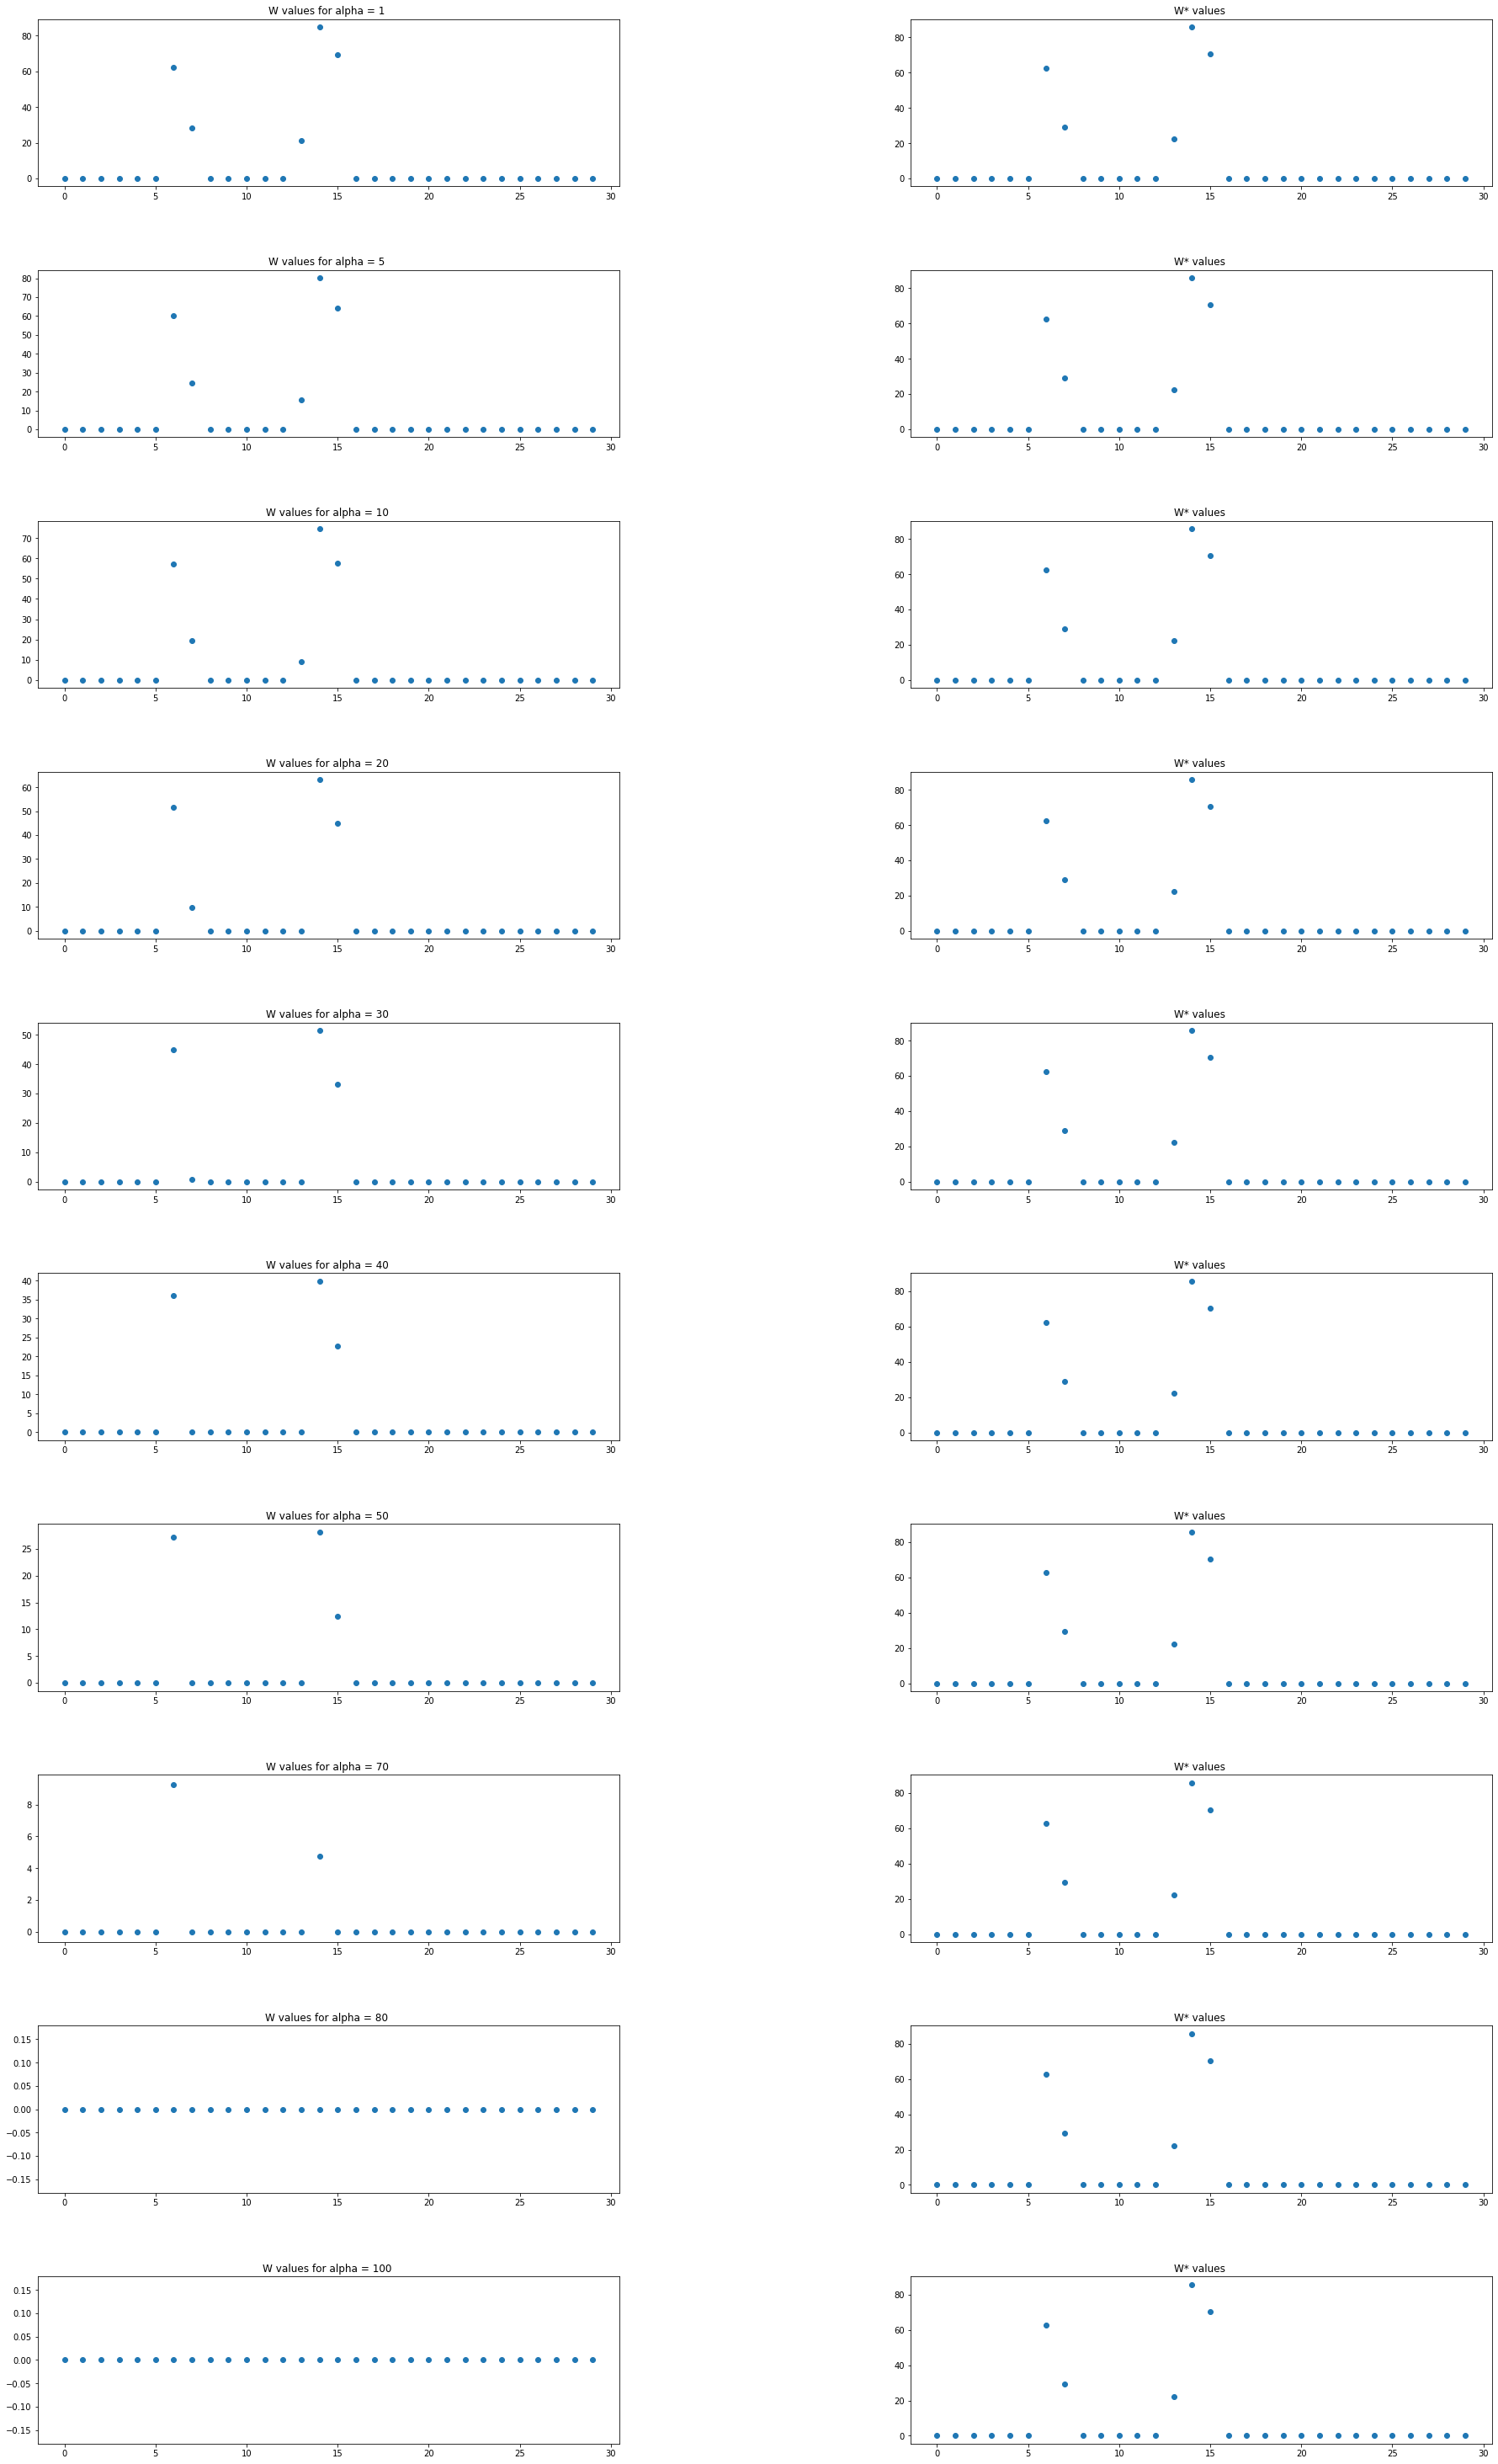

In [8]:
compare_ws_for_alphas([1, 5, 10, 20, 30, 40, 50, 70, 80, 100], X, y, coef)

Answers to questions (1), (2) and (3)

By training a Lasso model for different values of $\alpha$, we should notice the same behaviour underlined in the answers to the questions of the first exercise: if we let $\alpha$ tend to $0$, then we are just using least squares without regularization, that is to say, we are obtaining the exact same $w_{*}$ we would get by training a least squares algorithm with an explicit number of informative features, as when we call the function make_regression from scikit-learn, because the degree of sparsity we are imposing on the solution is the least possible and since we minimize the sum of squared residuals we obtain a $w$ with n_informative non-zero coefficients. This can be considered "the ideal case", in which we reconstruct all the important coefficients of the model and therefore we don't lose important information about the features. As we increase the value of $\alpha$, instead, we should expect the magnitude of the components of the estimated $w$ to decrease of a quantity proportional to $\alpha$, and therefore to get progressively far away from the true magnitude ("importance") of the components of $w_{*}$. In fact, we recall that training a Lasso model usually implies solving the following problem 

$$\min_{w \epsilon R^{d}} \frac{1}{n} ||y - Xw||^2 + \alpha~||w||_1$$

which can be rewritten in the following form

$$\min_{w \epsilon R^{d}} E(w) + R(w)$$

in this form, we distiguish between a convex-differentiable part $E(w)$ and a convex-non-differentiable part $R(w)$, and we use proximal methods to solve the problem, with $w_0 = 0$, for instance by using the ISTA algorithm:

$$w_{t+1} = Prox_{\gamma \lambda ||\cdot||}(w_{t-1} -\gamma \nabla E(w_{t-1}))$$

Since the proximity operator, which implements the so-called soft thresholding, is implemented in the following way for each component $j$ of $w_t$


$$(Prox_{\gamma \lambda ||\cdot|| }(w))^{j} = \begin{cases}
w^{j} - \gamma \lambda,\  w_{j} > \gamma \lambda\\
0,\  w_j \epsilon [-\gamma \lambda, \gamma \lambda]\\
w^{j} + \gamma \lambda,\    w_{j} < - \gamma \lambda
\end{cases}$$

then we can say that the parameter $\lambda$ controls the sparseness of the model, because it allows us to either set to $0$ components in $[-\gamma \lambda, \gamma \lambda]$ or to bring them closer to $[-\gamma \lambda, \gamma \lambda]$ if they are smaller than $-\gamma \lambda$ or bigger than $\gamma \lambda$. 

Note that in this case I expressed the problem of training a Lasso model with $\lambda$ as the label for the parameter, but the same criteria hold with $\alpha$, which is just another label for the same variable. 


From the experiments performed above, we can observe that we have a confirmation of what we have just supposed: for each pair of plots, we can notice how the magnitude of the components of $w$ moves away from the one of $w_{*}$ as we increase the value of $\alpha$. 

For what concerns the following observations, note well that they apply to a particular execution of the notebook on a dataset which was randomly generated from the function make_regression, therefore since in further executions I obviously obtained different results, I report the results that I obtained for a single execution and some general observations that I inferred from that experiment.


For what concerns an experiment executed on a random dataset generated from make_regression, I supposed that the value chosen by the algorithm for the step size $\gamma$ was near $1$, because by observing the second pair of plots ($\alpha = 5$), I noticed that all the $w^{j}$ which had value near $40$ got lowered to $35$, whereas the $w^{j}$ having value near $20$ got lowered approximately to $15$. I noticed the same behaviour also for all other values of $\alpha$. This is a clear proof of the application of the formula introduced above. In more executions of the notebook (different datasets) I noticed also the same general behaviour.


About the choice of setting $\alpha = 40$, it may be the best one or not depending on the structure of the data which is randomly generated, and on the magnitude of the components of $w_*$: in fact, we have to recall that, as one can guess from https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html, the dataset generated with the make_regression function has $5$ important features, because n_informative=5 in our case. Therefore, the number of non-zero entries of $w_*$ corresponds exactly to the best result we can achieve when training a sparse model using Lasso, because $5$ over $30$ is already a small number of the overall features. For  $\alpha = 40$, in many experiments I was setting to zero too many components of $w$ with respect to the true $w_*$: usually 2 components with magnitude near to $40$ and $1$ with magnitude near to $20$ (3 components over 5). I supposed that better values for $\alpha$ could have been, in that case, $10$, $20$ or $30$: in case $\alpha = 10$, I was in fact keeping all the non-zero components of $w$ obtained in $w_{*}$, including the least important, which had magnitude near to $20$ in $w_*$, whereas with $\alpha = 20$ and $\alpha = 30$ I was setting to $0$ only such component and I was lowering a bit the other ones. The solution I would suggest in that case among $10$, $20$ or $30$ is either $\alpha = 30$ or $\alpha=10$, depending on the choices we want to make with our model: if we want to have a faster convergence and still retain almost all the important components of $w_{*}$, then maybe we could forget about the least important component of $w_*$ and put $\alpha=30$, whereas if we don't want to lose any information at all but we still want to be faster in convergence than the case $\alpha=1$, then we should put $\alpha=10$. 






## 2. Recap on the regularization path

We sensed that the role played by the regularization parameter $\alpha$ is crucial. When performing variable selection in high-dimensional contexts it may be helpful to observe the weight assigned to each variable for increasing values of $\alpha$.

An intuitive representation of such phenomenon is called **`regularization path`**

### 2.1 Hands on the Lasso path

With the toy regression problem above, implement a function that estimates the `lasso path` and visualize it.

In [9]:
def compare_ws_for_alphas_generic(alpha_list, X, y, w_star, regressor):
    fig, axs = plt.subplots(len(alpha_list), 2)
    i=0
    for alpha in alpha_list:
        regr = regressor(alpha=alpha)
        regr.fit(X, y)
        x_values = np.arange(len(regr.coef_))
        x_values_w_star = np.arange(len(coef))
        curr_axis = axs[i, 0]
        curr_axis.set_title("W values for alpha = %s " % alpha)
        curr_axis.scatter(x_values, regr.coef_)
        curr_axis = axs[i, 1]
        curr_axis.set_title("W* values ")
        curr_axis.scatter(x_values_w_star, w_star)
        i+=1
    fig.subplots_adjust(top=5,bottom=-5,left=-2,right=2, hspace=0.5, wspace=0.5) 

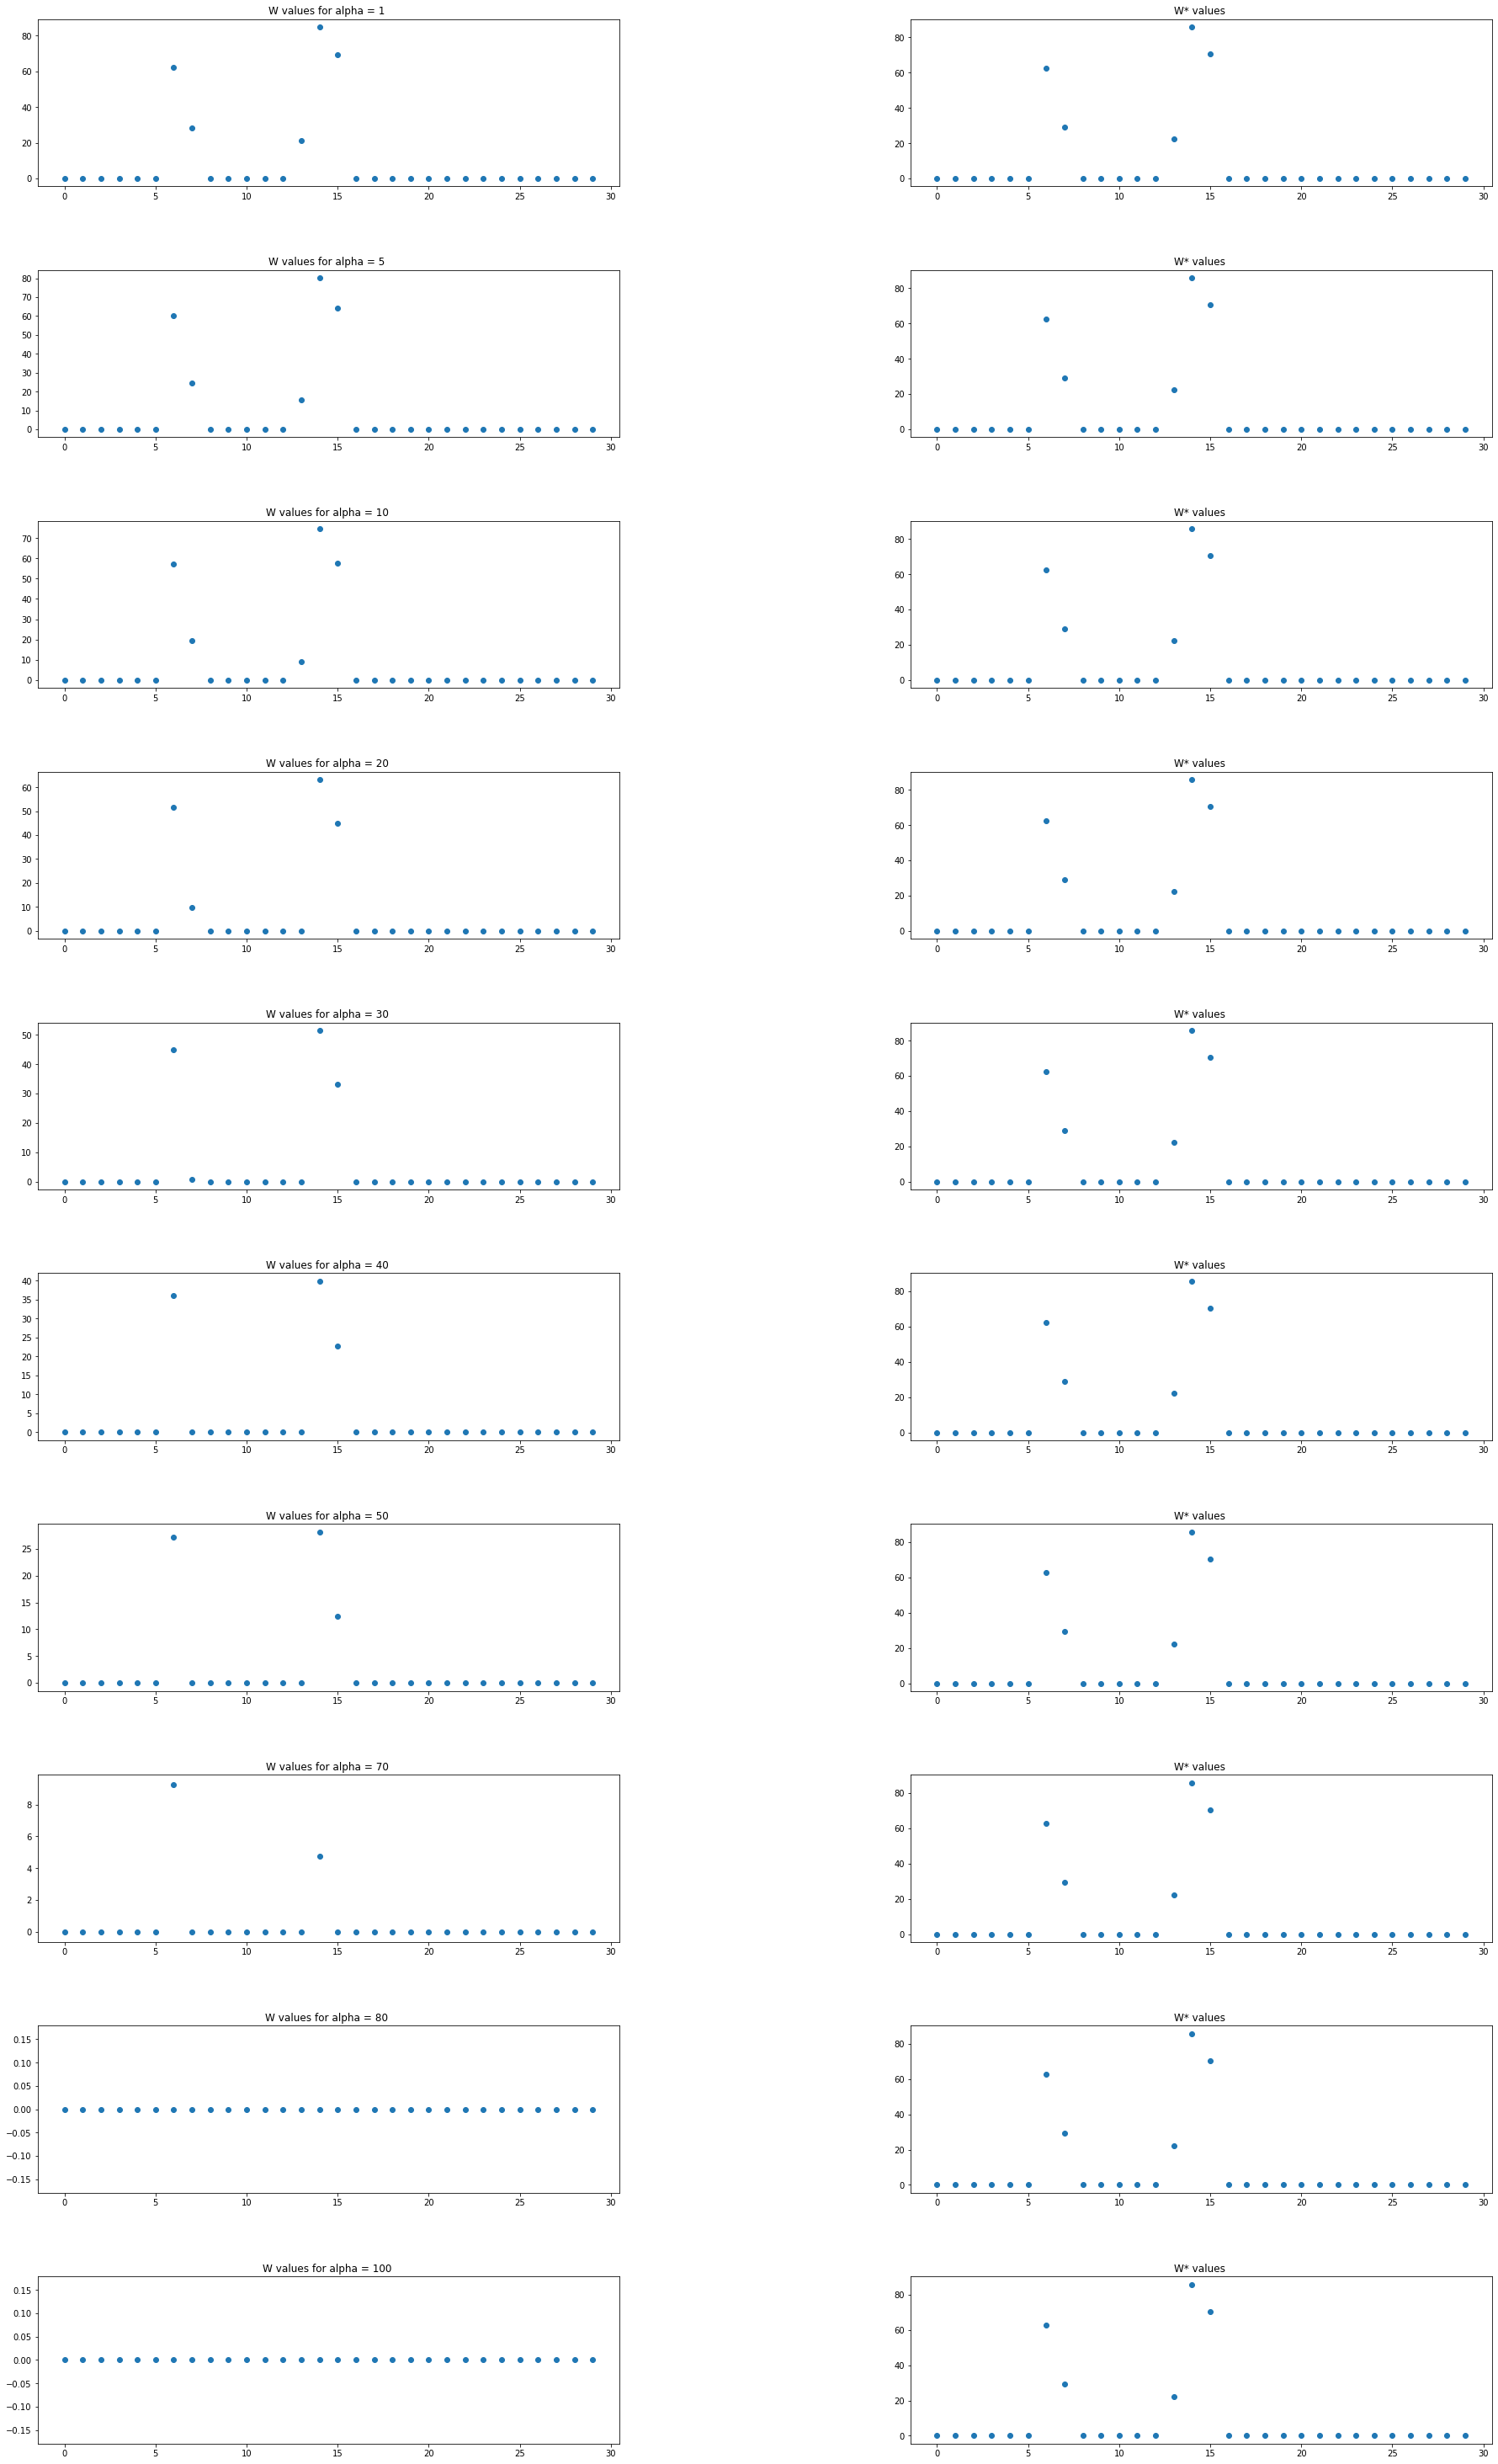

In [10]:
compare_ws_for_alphas_generic([1, 5, 10, 20, 30, 40, 50, 70, 80, 100], X, y, coef, Lasso)

**Implement a function that estimates the `ridge path`.Compare your results and comment differences**

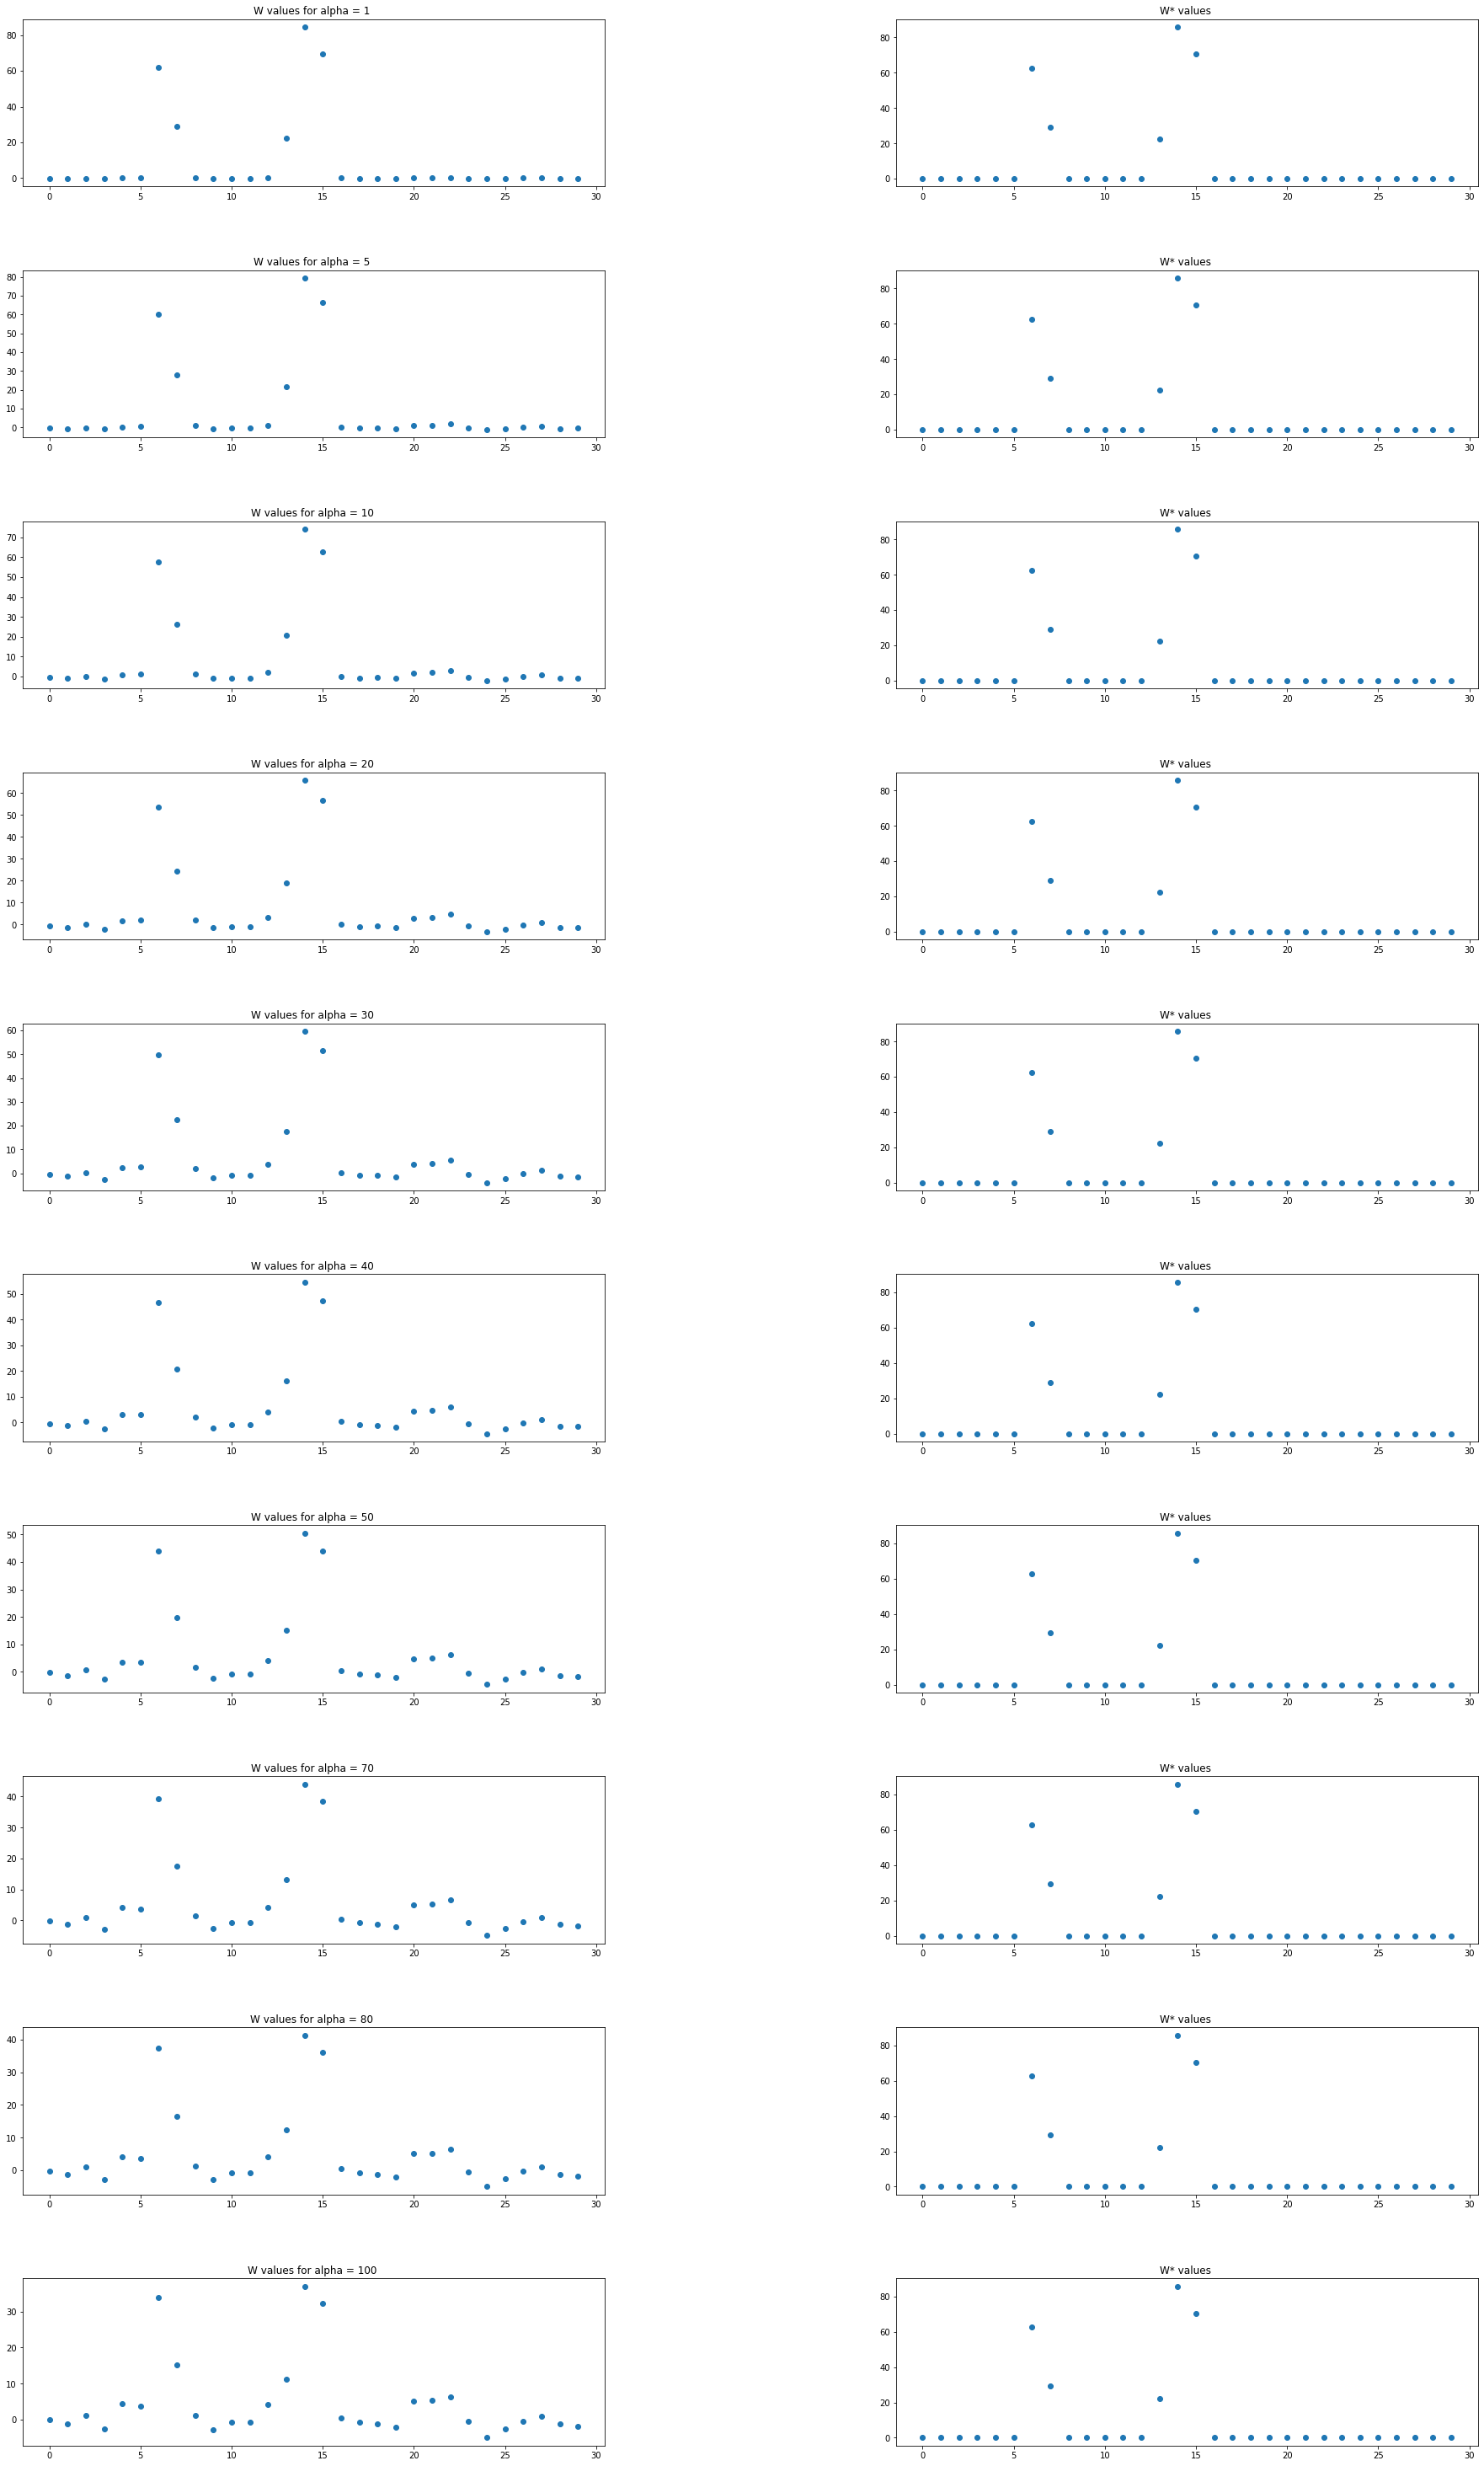

In [11]:
compare_ws_for_alphas_generic([1, 5, 10, 20, 30, 40, 50, 70, 80, 100], X, y, coef, Ridge)

In [12]:
def plot_regularization_path(alpha_list, X, y, regressor):
    coeff_values = np.zeros((len(alpha_list), X.shape[1]))
    i=0
    
    for alpha in alpha_list:
        mdl = regressor(alpha=alpha)
        mdl.fit(X, y)
        coeff_values[i, :] = mdl.coef_
        i+=1

    for feature_num in np.arange(X.shape[1]):
        plt.xlabel("alpha")
        plt.ylabel("component values")
        plt.semilogx(alpha_list, coeff_values[:, feature_num])
    plt.gca().invert_xaxis()
       

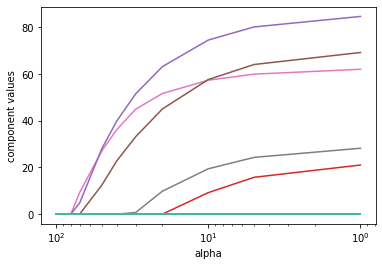

In [13]:
plot_regularization_path([1, 5, 10, 20, 30, 40, 50, 70, 80, 100], X, y, Lasso)

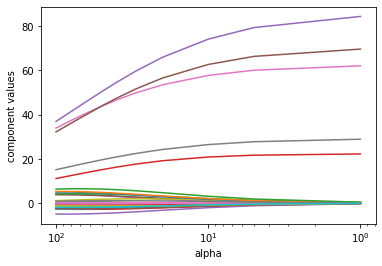

In [14]:
plot_regularization_path([1, 5, 10, 20, 30, 40, 50, 70, 80, 100], X, y, Ridge)

The regularization path plotted in the previous cells has been coded according to the documentation at https://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html. I have also added a scatter plot of the weights of $w$ both for the Lasso and the Ridge models, in order to provide a more detailed insight on the values of the components. 

For the following observations, I will use the symbol $w_{w*_{0}}^{j}$ to refer to the values of the weights of $w$ corresponding to the zero components of $w_*$ and the symbol $w_{w*_{!=0}}^{j}$ to refer the values of the weights of $w$ corresponding to the non-zero components of $w_*$.

From all the plots provided in the previous cells, we notice the following facts: by increasing $\alpha$, the $L_1$ norm increases the level of sparsity of the solution, while the $L_2$ does not. In fact, from the regularization path plot of the Ridge model, we can observe that all the $w_{w*_{!=0}}^{j}$ never converge exactly to $0$ as we consider large values for alpha $\alpha$, even though they still decrease progressively of a certain quantity each, whereas many of the $w_{w*_{0}}^{j}$ get "shifted" of a negative or positive displacement from $0$. This does not happen for the Lasso model, for which, with large values of $\alpha$, the $w_{w*_{!=0}}^{j}$ converge exactly to $0$ and the $w_{w*_{0}}^{j}$ remain unchanged. The difference between the two models can also be noticed if we think about the speed at which the magnitude of the components decreases when we increase the value of $\alpha$: the convergence to a "sparser" solution (I use this term even if we know that $L_2$ does not give sparsity) is, for instance, significantly faster in the Lasso model than in the Ridge model for the $w_{w*_{!=0}}^{j}$, which we recall to be the n_informative coefficients of $w_*$. The same behaviour can be observed by looking at the scatter plots provided for each value of $\alpha$, in which for convenience I also report the corresponding scatter plots of the components of $w_*$.

### 2.2 Lasso and correlations among features

In presence of correlation between variables, the lasso penalty may not be very informative. Let's try to evaluate it on a toy dataset in which each informative variable is repeated twice.

Use `n=100` samples, `half_d_rel=5`, `d_dummy = 25`.

In [15]:
n = 100
half_d_rel = 5
d = 30
d_dummy = d - half_d_rel

X, y, coef = make_regression(n_samples=n, n_features=d-half_d_rel, n_informative=half_d_rel, coef=True)
relevant = np.nonzero(coef)[0]
X = np.hstack((X, -2*X[:,relevant]))

print("Data shape: {}".format(X.shape))

Data shape: (100, 30)


**The total number of relevant variables here is `2*half_d_rel = 10`.**

**Use the function implemented in Exercise #2.1 and visualize the lasso path for this dataset.**

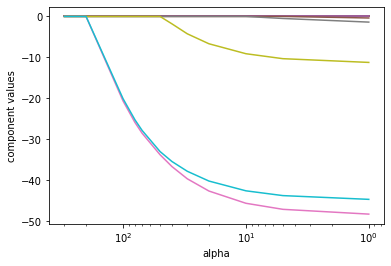

In [16]:
plot_regularization_path([1, 5, 10, 20, 30, 40, 50, 70, 80, 100, 200, 300], X, y, Lasso)

**<font color='red'>How many selected variable do you see?Why?</font>**

Answers to questions (1) and (2):

The number of selected variables is, in this case, at most equal to $5$, as we can see from the above plot. This happens because the $L_1$ norm, by definition, does not deal appropriately with correlation: in our dataset, we in fact added a copy of the most relevant features and we multiplied each entry of such columns by a constant -2, therefore the newly added features are collinear with the n_informative that have already been created with the dataset by using the make_regression function, and thus correlated with them. Therefore, if we train a Lasso model on such dataset, only $1$ among $2$ in each pair of correlated features will be effectively selected to be included in the vector $w$, and this motivates the fact that we end up obtaining only 5 out of 10 relevant features.

## `Elastic-Net` model :

$$\min_w \frac{1}{2n} ||y - Xw||^2_2 + \alpha \cdot l_{1_{ratio}} \cdot ||w||_1 + \frac{1}{2}~\alpha \cdot (1 - l_{1_{ratio}}) \cdot ||w||^2_2$$

or equivalently as:

$$\min_w \frac{1}{2n} ||y - Xw||^2_2 + \tau~||w||_1 + \mu~||w||^2_2$$

with appropriate parameters formulation.
The Elastic-Net, thanks to the combined influence of the $\ell_1$ and the $\ell_2$-norm, achieves a sparse and stable solution in which joint selection of collinear variables is promoted.

Fix the `l_1ratio=0.5` and evaluate the Elastic-Net path on the datasets of **Exercise 2.2**

The l1 ratio is by default 0.5, see the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

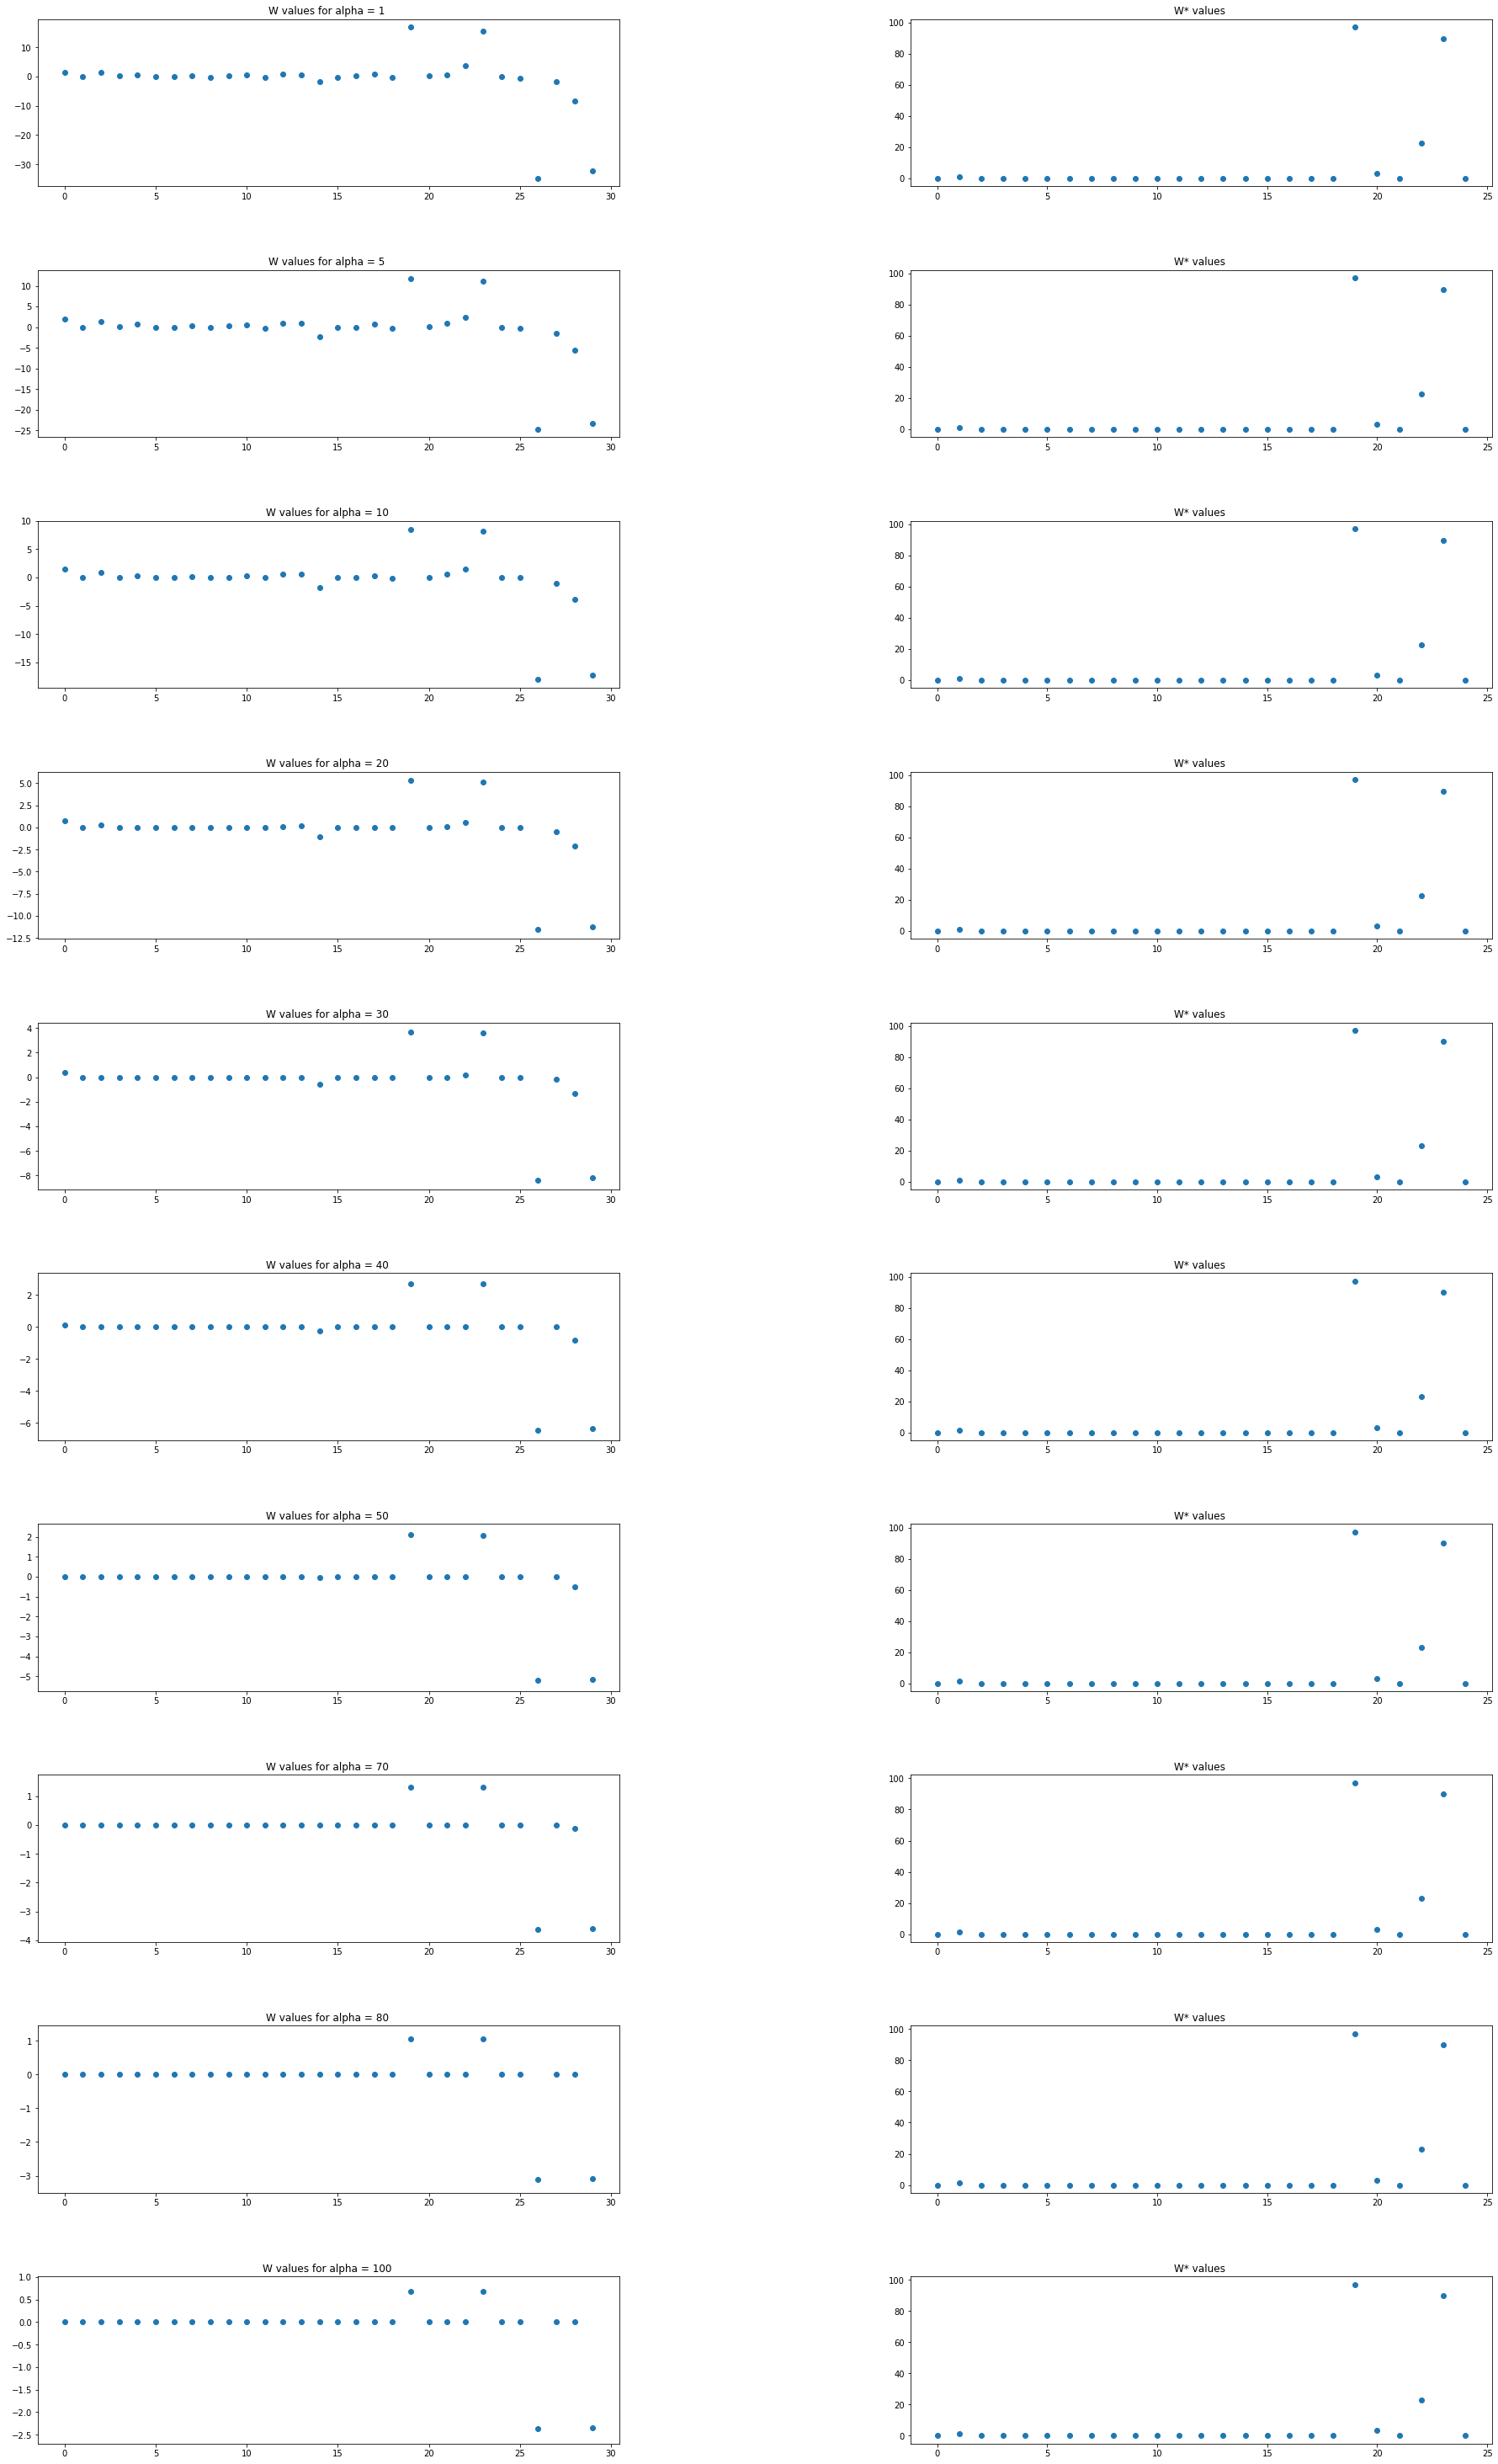

In [17]:
compare_ws_for_alphas_generic([1, 5, 10, 20, 30, 40, 50, 70, 80, 100], X, y, coef, ElasticNet)

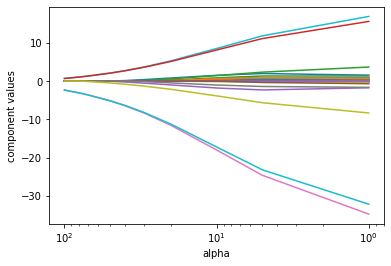

In [18]:
plot_regularization_path([1, 5, 10, 20, 30, 40, 50, 70, 80, 100], X, y, ElasticNet)

**<font color='red'>How many selected variable do you see?Why?</font>**

**<font color='red'> Which is the asymptotic behavior of the weights corresponding to correlated features?</font>**

Answers to questions (1) and (2):

First of all, we have to observe that in this case the value of l1_ratio is $0.5$, therefore the penalty used in the elastic net model will be a combination of the $L_1$ and the $L_2$ norm. I therefore expect to obtain a sparse and stable solution in which joint selection of collinear variables is promoted (as already said when introducing the elastic net model in this notebook). This recall from theory is confirmed by the above plot: the number of selected variables is, in this case, for sure greater than $5$ and in most experiments at most equal to $10$ (as usual, I write the comments with respect to the experiments that I make, but things may change in future executions), which is exactly the number of the most important features in our toy dataset. Elastic net, in fact, distributes weights equally among the correlated features: for instance, in case we had only two variables, an algorithm implementing elastic net could assign half weight to one variable and half to another one, as long as the sum of such weights gives us back the $L_1$ norm part of the penalty that we configured when setting the value for l1_ratio.

Answer to question (3):

The asymptotic behaviour of the weights that I observe from the plot is the following: the magnitude of each pair of correlated components of the vector $w$ goes to $0$ as we increase the value of the regularization parameter $\alpha$, and this happens symmetrically for the two variables with respect to the x-axis. This is the same as saying that "the distributed weight of two or more variables should go to $0$ as I increase the value of $\alpha$". The motivations for such behaviour can be retrieved from observations that we made before: intuitively, the elastic net can be seen as a modification of the Lasso model that allows correlation, therefore we can guess that the effect of increasing the regularization parameter $\alpha$ would be the same as in the Lasso case, but mitigated by the possibility of choosing a greater number of important variables from the feature set.

# 3 Elastic-net for variable selection in Microarray study

**We will train an ElasticNetClassifier (take a look at the file `enet_classifier.py`) on the [Golub dataset](http://portals.broadinstitute.org/cgi-bin/cancer/publications/pub_paper.cgi?paper_id=43) which contains microarray data measured from two classes of leukemia: acute myeloid leukemia (AML) and acute lymphoblastic leukemia (ALL).**

In [19]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from collections import Counter
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from enet_classifier import ElasticNetClassifier

### 3.1. Load data

Let's load the dataset with `pandas` in the usual way (`pandas.read_csv`). Read both data and labels.

In [20]:
data = pd.read_csv("gedm.csv", header=0, index_col=0).T
print("n_samples = {} | n_variables = {}".format(*data.shape))

n_samples, n_variables = data.shape
data.head()

n_samples = 38 | n_variables = 7129


Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25


In [21]:
labels = pd.read_csv('labels.csv', header=0, index_col=0)
print("n_samples (AML) = {} | n_samples (ALL) = {}".format(
    np.sum(labels.values == 'AML'), np.sum(labels.values == 'ALL')))

labels.head()

n_samples (AML) = 11 | n_samples (ALL) = 27


,status
sample,
1,ALL
2,ALL
3,ALL
4,ALL
5,ALL


**Encode the labels into the standard binary classification problem: associate ALL with class `1` and AML with class `-1`.**

In [22]:
binary_labels = np.where(labels.values == 'ALL', 1, -1)

<font color='red'><b>What is the accuracy score of a random classifier?</b></font>

A dummy classifier is a type of classifier which does not generate any insight about the data and classifies the given data using only simple rules. The classifier’s behavior is completely independent of the training data as the trends in the training data are completely ignored and instead uses one fixed strategy to predict the class labels.
It is used only as a simple baseline for comparisons with any other classifier. It is based on the philosophy that any analytic approach for a classification problem should be better than a random guessing approach.
It is especially useful for comparisons with "true" classifiers when we use datasets where we are sure of a class imbalance, like in this case for example, in which the number of samples of the class "AML" is greater than the number of samples of the class "ALL".
In the following lines of code, I compare the results of the evaluation of various strategies of a dummy classifier with the well-known support vector machine, which is cross-validated over the dataset. The random classifier is coded by choosing the strategy 'uniform' when configuring the dummy classifier. Clearly, the results of the dummy classifier are far worse than the ones of the support vector machine. In particular, the accuracy of the 'uniform' dummy classifier is equal to $0.625$, which is approximately equal to the percentage of labels associated to the class with the greater number of samples in the training set. This means that an approach based on a random uniform generation is not enough for imbalanced problems, because if the number of samples of the training set for a class is far smaller than the other one, then we will be more likely to generate a label of the majority class from the distribution, which is uniform with respect to the training set.

In [23]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import ShuffleSplit

train_index, test_index = next(ShuffleSplit(n_splits=1, test_size=0.2, train_size=0.8, random_state=150).split(data))

X_test = data.iloc[test_index]
X_train = data.iloc[train_index]
Y_test = binary_labels[test_index]
Y_train = binary_labels[train_index]

strategies = ['most_frequent', 'stratified', 'uniform', 'constant'] 
  
test_scores = [] 
for s in strategies: 
    if s =='constant': 
        dclf = DummyClassifier(strategy = s, random_state = 0, constant = -1) 
    else: 
        dclf = DummyClassifier(strategy = s, random_state = 0) 
    dclf.fit(X_train, Y_train) 
    score = dclf.score(X_test, Y_test) 
    test_scores.append(score) 
    
print ("The value of the test score obtained using a most_frequent strategy is ", test_scores[0])
print ("The value of the test score obtained using a stratified strategy is ", test_scores[1])
print ("The value of the test score obtained using a uniform strategy is ", test_scores[2])
print ("The value of the test score obtained using a constant strategy is ", test_scores[3])



The value of the test score obtained using a most_frequent strategy is  0.625
The value of the test score obtained using a stratified strategy is  0.75
The value of the test score obtained using a uniform strategy is  0.625
The value of the test score obtained using a constant strategy is  0.375


Classification error when assessing a SVC classifier on a test set :  0.0


,C,Accuracy
0,0.00001,0.966667
1,0.00010,0.966667
2,0.00100,0.966667
3,0.01000,0.966667
4,0.10000,0.966667
5,1.00000,0.966667
6,10.00000,0.966667
7,100.00000,0.966667
8,1000.00000,0.966667
9,10000.00000,0.966667


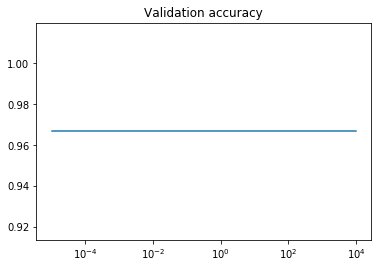

In [24]:
from sklearn.svm import SVC


def calcError(Ypred, Y):
    class_err = np.count_nonzero(Ypred!=Y)/len(Y) 
    return class_err

clf_ = SVC(kernel='linear')
Cs = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
grid_search = GridSearchCV(clf_, dict(C=Cs), cv=StratifiedKFold(n_splits=10))
grid_search.fit(X_train, Y_train)

results_df = pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
Y_pred_test = grid_search.predict(X_test)
print ("Classification error when assessing a SVC classifier on a test set : ", calcError(Y_pred_test.flatten(), Y_test.flatten()))

plt.title("Validation accuracy")
plt.semilogx(results_df['C'], results_df['Accuracy'])
results_df.head(100)


**Note that some columns of `data` start with `AFFX`. These are not real features. Instead, they are some control probes related to the microarray structure. For this reason, we can remove them before the actual analysis.**

In [25]:
relevant_features = data.columns[~data.columns.str.startswith("AFFX")]
data = data.loc[:, relevant_features]

### 3.2. Data visualization

**We can visualize the data by projecting them on a 2-dimensional space with `PCA`.**

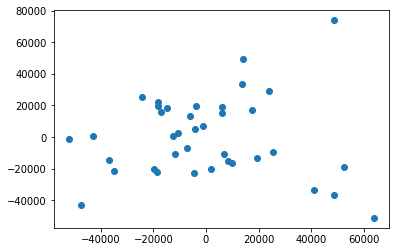

In [26]:
pca = PCA(n_components=2)
proj = pca.fit_transform(data)
plt.scatter(proj[:,0], proj[:, 1])

### 3.3 Fitting the model

To control separately $\mu$ and $\tau$ in the ElasticNet model, you need to solve the appropriate linear system of equationa.

$ \alpha l_{1_{ratio}} = \tau$

$ \frac{\alpha}{2} (1 - l_{1_{ratio}}) = \mu$

$\dots$

$ l_{1_{ratio}} = \frac{\tau}{2 \mu + \tau}$

$ \alpha = 2 \mu + \tau$



**Write a Python function which performs the conversion from `tau` and `mu` to `alpha` and `l1_ratio`.**

In [27]:
#returns l1, alpha
def enet_conversions(mu, tau):
    return tau/(2*mu + tau), 2*mu + tau


### 3.4 Nested variable selection

We will observe the effect of increasing the value of `mu`, which controls the amount of variable correlation tolerated in the solution. For example, with fixed `tau`, increasing `mu` should result in selecting nested list of variables, as in [DeMol09](http://online.liebertpub.com/doi/abs/10.1089/cmb.2008.0171).

**Implement a data analysis pipeline following the next steps:**

1. Fix a value for `mu_0`, *e.g.* `mu_0 = 1`.

2. Split the dataset into `K` folds (non-overlapping groups).

    a. For each iteration keep $\frac{1}{K}$ samples aside and use it as test set.
    
    b. Use the remaining $\frac{K-1}{K}$ samples and use them as training set to optimize the regularization parameter `tau` via an inner `GridSearch` cross-validation.
    
    c. The best model is achieved with the optimal `tau` fitted on the training set.

    d. Evaluate the best model on the test set and keep track of the accuracy score and the list of selected variables.
    
This would allow us to obtain a ranking of variables.

In [28]:
X, y = data, binary_labels#training data, labels

#data, binary_labels
#Find an appropriate number of folds in which split the dataset
K = 7

kf = StratifiedKFold(n_splits=K, shuffle=True)

enet = ElasticNetClassifier()

Use the following ranges for the parameters:
- `tau_range` in logarithmic scale from `1e-1` to `1e5`
- `mu_range` as [`1e4`, `1e5`, `1e7`, `1e8`]

In [29]:
def compute_qtys_needed(y_pred, y, class_labels):
    pos_class = class_labels[class_labels > 0]
    neg_class = class_labels[class_labels <= 0]
    pos_y_idx = y == pos_class
    neg_y_idx = y == neg_class
    pos_y_pred_idx = y_pred == pos_class
    neg_y_pred_idx = y_pred == neg_class
    TP = np.count_nonzero(y_pred[pos_y_idx] == pos_class)
    TN = np.count_nonzero(y_pred[neg_y_idx] == neg_class)
    FP = np.count_nonzero(y[pos_y_pred_idx] == neg_class)
    FN = np.count_nonzero(y[neg_y_pred_idx] == pos_class)
    return TP, TN, FP, FN
    
def calc_balanced_accuracy(y_pred, y, class_labels):
    TP, TN, FP, FN = compute_qtys_needed(y_pred, y, class_labels)
    return (float(TP / (TP + FN)) + float(TN / (TN + FP)))/2
    


In [30]:
X.head()


Gene Accession Number,hum_alu_at,A28102_at,AB000114_at,AB000115_at,AB000220_at,AB000409_at,AB000449_at,AB000450_at,AB000460_at,AB000462_at,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,15091,151,72,281,36,-299,57,186,1647,137,...,185,511,-125,389,-37,793,329,36,191,-37
2,11038,263,21,250,43,-103,169,219,2043,188,...,169,837,-36,442,-17,782,295,11,76,-14
3,16692,88,-27,358,42,142,359,237,1997,91,...,315,1199,33,168,52,1138,777,41,228,-41
4,15763,484,61,118,39,-11,274,245,2128,-82,...,240,835,218,174,-110,627,170,-50,126,-91
5,18128,118,16,197,39,237,311,186,1608,204,...,156,649,57,504,-26,250,314,14,56,-25


In [31]:
from functools import reduce

tau_range = [0.1, 1, 10, 100, 1000, 10000, 100000]
mu_range = [100, 1000, 10000, 100000, 10000000, 100000000]

scores = np.zeros(len(mu_range))
selected_variables = np.zeros((len(mu_range)*K, X.shape[1]))
i=0
for mu, j in zip(mu_range, range(len(mu_range))):
    l1s, alphas = reduce(lambda acc, l1_alpha:(acc[0] + [l1_alpha[0]], acc[1] + [l1_alpha[1]]),\
                  map(lambda param_pair: (enet_conversions(param_pair[0], param_pair[1])), \
                  map(lambda tau:(mu, tau), tau_range)), ([],[]))
    for train_index, test_index in kf.split(X, y):
        X_train = X.iloc[train_index]
        Y_train = y[train_index]  
        X_test = X.iloc[test_index]
        Y_test = y[test_index]
        grid_search = GridSearchCV(enet, dict(alpha=alphas, l1_ratio=l1s), cv=StratifiedKFold(n_splits=K, shuffle=True))
        grid_search = grid_search.fit(X_train, Y_train)
        Y_pred_test = grid_search.predict(X_test)
        scores[j] = scores[j] + calc_balanced_accuracy(Y_pred_test.flatten(), Y_test.flatten(), np.unique(Y_test.flatten()))
        #the action of computing the selected variables is performed in the last two exercises. In the following line I just collect all the coefficients
        selected_variables[i, :] = grid_search.best_estimator_.coef_.flatten()
        i+=1

scores = scores / K


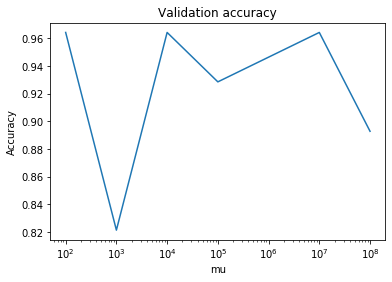

In [32]:
plt.title("Validation accuracy")
plt.xlabel("mu")
plt.ylabel("Accuracy")
plt.semilogx(mu_range, scores)

### 3.5 Build a `pandas` DataFrame whose values correspond to the number of times each variable is selected for different values of $\mu$

In [33]:
index_names=mu_range
df_data = []
old_offset = 0
i=0
for mu in mu_range:
    curr_offset = old_offset+K
    mu_coefs = selected_variables[old_offset:curr_offset, :]
    frequencies = np.count_nonzero(mu_coefs, axis=0)
    row_df = pd.DataFrame([frequencies], index=[i])
    df_data.append(row_df)
    old_offset = curr_offset
    i=i+1

rename_dict = {}
for mu, idx in zip(mu_range, np.arange(len(mu_range))):
    rename_dict[idx] = "mu = " + str(mu)
    
freq_df = pd.concat(df_data)
freq_df.rename(index=rename_dict,inplace=True)
freq_df.head(100)

,0,1,2,3,4,5,6,7,8,9,...,7061,7062,7063,7064,7065,7066,7067,7068,7069,7070
mu = 100,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mu = 1000,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mu = 10000,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mu = 100000,7,0,0,2,0,0,0,0,2,0,...,0,0,0,0,0,1,0,0,6,0
mu = 10000000,7,7,6,7,7,6,7,7,7,6,...,6,7,6,6,6,6,7,5,7,6
mu = 100000000,7,7,7,7,6,7,7,6,7,7,...,7,7,6,7,6,7,7,7,7,5


### 3.6 Build an explanatory visualization of the selection frequency for each variable, at different choices of $\mu$

The histograms plotted in the following cells represent the number of selected variables associated to each value of the selection frequency.

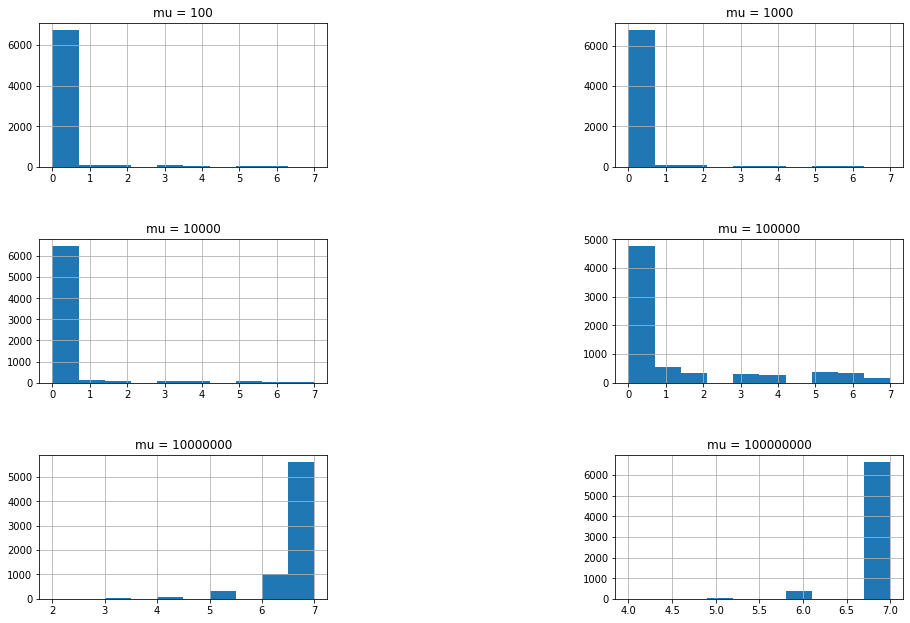

In [34]:
freq_df.T.hist()
plt.subplots_adjust(top=1,bottom=-1,left=-1,right=1, hspace=0.5, wspace=1)

In [36]:
binary_df_T = freq_df.where(freq_df ==0, 1).T
non_zero_counts = np.zeros(len(mu_range))
percentages = np.zeros(len(mu_range))
percentages[len(percentages)-1]=100 #if we are at the last level, then by convention the percentage value is 100
for i, j in zip(range(len(mu_range)), range(1, len(mu_range))):
    mu_1_sel_var = binary_df_T.iloc[:, i]
    mu_2_sel_var = binary_df_T.iloc[:, j]
    var_intersection = np.multiply(mu_1_sel_var, mu_2_sel_var)
    if (non_zero_counts[i]==0):
        non_zero_counts[i] = np.count_nonzero(binary_df_T.iloc[:, i])
    if (non_zero_counts[j]==0):
        non_zero_counts[j] = np.count_nonzero(binary_df_T.iloc[:, j])
    percentages[i] = (np.count_nonzero(var_intersection) / float(non_zero_counts[i]))*100

list(zip(mu_range, non_zero_counts, percentages))
my_df = pd.DataFrame(list(zip(mu_range, non_zero_counts, percentages)),columns=['mu', '# selected variables', '% nested variables (w.r.t. next mu)'])
my_df.head(10)

,mu,# selected variables,% nested variables (w.r.t. next mu)
0,100,321.0,71.339564
1,1000,281.0,93.238434
2,10000,594.0,96.296296
3,100000,2294.0,100.000000
4,10000000,7071.0,100.000000
5,100000000,7071.0,100.000000


<font color='red'><b>What do you observe?</b></font>

From the histograms, we can observe that the value of $\mu$ controls the amount of variable correlation in the solution. In fact, as we increase the value of $\mu$, the number of selected variables for frequency values near $0$ decreases, and the one corresponding to higher frequency values increases; that is, such number gets "shifted to the right". This gives also us the intuition that as we increase the value of $\mu$, we should select more and more nested lists of variables, because the variables that have been chosen for smaller values of $\mu$ will be chosen more and more times for larger values of $\mu$ during the splitting procedure (I recall that we compute the best coefficients multiple times for each value of $\mu$), whereas the variables that are not chosen at all for small values of $\mu$ will be more likely to get selected at least once.

The intuition provided by the histogram is confirmed quantitatively to some extent by the last code cell, in which I compute the percentage of selected variables which are the same between two sets of coefficients' frequencies associated to every possible pair of consecutive values of $\mu$, as reported in the paper at the following URL: https://arxiv.org/pdf/0809.1777.pdf. 
We can notice that, for the provided values of $\mu$, such percentage is in most cases between $90\%$ and $100\%$, with an exception made for the transition 100-->1000, in which we have only the $71\%$. We can therefore observe that we have a partial confirmation of the first statement "nested lists of variables", even though unfortunately I couldn't motivate why I didn't obtain $100\%$ for every possible pair of consecutive values of $\mu$, as reported in the paper.